In [53]:
import pandas as pd

In [65]:
df=pd.read_csv('F:/Uni of Kent/machine learning assignment/sales_data.csv')

In [66]:
df.head(5)

,Date,Sales
0,2005-01-01,10827
1,2005-02-01,12049
2,2005-03-01,18298
3,2005-04-01,17834
4,2005-05-01,16480


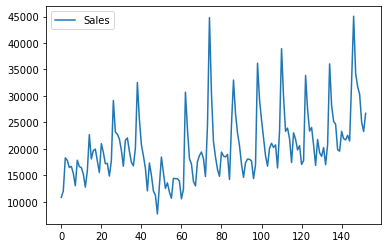

In [67]:
#Line Plot
import matplotlib.pyplot as plt
df.plot()
plt.show()

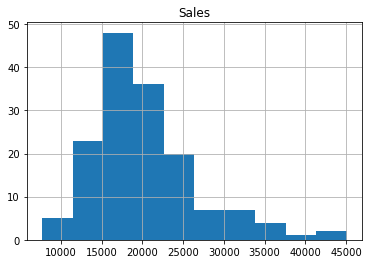

In [68]:
#Histogram Plot
df.hist()
plt.show()

In [71]:
# Cleaning up the data as the we have monthly sales of compact crane product for the forecast
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,2005-01-01,10827
1,2005-02-01,12049
2,2005-03-01,18298
3,2005-04-01,17834
4,2005-05-01,16480


In [72]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [73]:
#indexing w.r.t the month
df.set_index('Month',inplace=True)

In [74]:
df.head(5)

,Sales
Month,
2005-01-01,10827
2005-02-01,12049
2005-03-01,18298
2005-04-01,17834
2005-05-01,16480


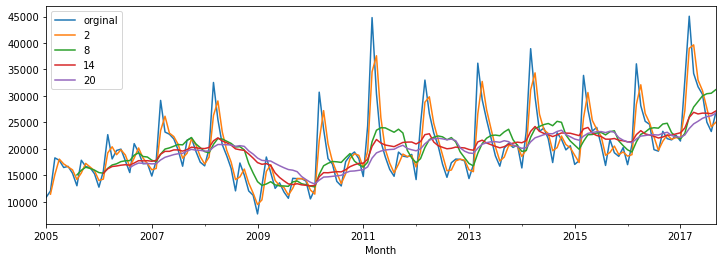

In [75]:
plt.figure(figsize=(12,4))
df.Sales.plot(label='orginal')
for i in range(2,26,6):
    df['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

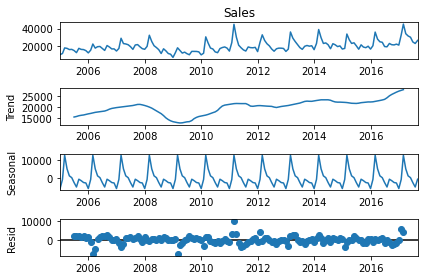

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_add_sea=seasonal_decompose(df.Sales,period=12)
decompose_add_sea.plot()
plt.show()

C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


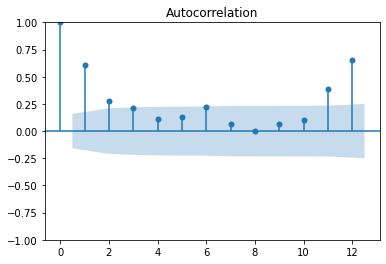

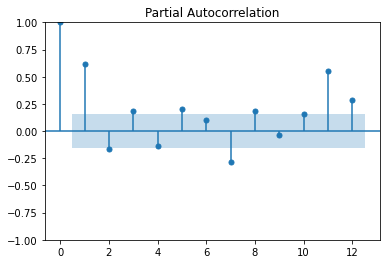

In [78]:
import statsmodels.graphics.tsaplots as tsaplots
tsaplots.plot_acf(df.Sales,lags=12)
tsaplots.plot_pacf(df.Sales,lags=12)
plt.show()

In [79]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [80]:
#Splitting Dataset
train=df.head(103)
test=df.tail(50)

# Simple Exponential Method

In [81]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test['Sales'])

C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


16.3226616712234

# Holt Method

In [82]:
from statsmodels.tsa.holtwinters import Holt
holt_model=Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_trend=0.2)
pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_holt,test['Sales'])


C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


95.83481182589274

# Holt Method

In [83]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_smt_model=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_exp_smt=exp_smt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_exp_smt,test['Sales'])

C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


15.651048194826451

# Holts winter exponential smoothing with additive seasonality and additive trend


In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_smt_model=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_exp_smt=exp_smt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_exp_smt,test['Sales'])

C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


15.651048194826451

# Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [86]:
exp_smt_mul_model=ExponentialSmoothing(train['Sales'],seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_exp_smt_mul=exp_smt_mul_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_exp_smt_mul,test['Sales'])

C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


15.839307698650648

In [87]:
# separate out a validation dataset
split_point = len(df) - 10
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 143, Validation 10


In [89]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train 
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [90]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=18459.000, Expected=15516.000
>Predicted=15516.000, Expected=12540.000
>Predicted=12540.000, Expected=13586.000
>Predicted=13586.000, Expected=11855.000
>Predicted=11855.000, Expected=10666.000
>Predicted=10666.000, Expected=14437.000
>Predicted=14437.000, Expected=14366.000
>Predicted=14366.000, Expected=14375.000
>Predicted=14375.000, Expected=13913.000
>Predicted=13913.000, Expected=10551.000
>Predicted=10551.000, Expected=12357.000
>Predicted=12357.000, Expected=30712.000
>Predicted=30712.000, Expected=23738.000
>Predicted=23738.000, Expected=18163.000
>Predicted=18163.000, Expected=17131.000
>Predicted=17131.000, Expected=13856.000
>Predicted=13856.000, Expected=12998.000
>Predicted=12998.000, Expected=17592.000
>Predicted=17592.000, Expected=18740.000
>Predicted=18740.000, Expected=19411.000
>Predicted=19411.000, Expected=18150.000
>Predicted=18150.000, Expected=14778.000
>Predicted=14778.000, Expected=24326.000
>Predicted=24326.000, Expected=44803.000
>Predicted=44803

# ARIMA Modelling

In [91]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [92]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Grid Search For p,q,d

In [93]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float(), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.5f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.5f' % (best_cfg, best_score))

In [94]:
# load dataset
train
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [95]:
import pandas as pd
import numpy as np
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def evaluate_models(train, p_values, d_values, q_values):
    best_score, best_order = float('inf'), None
    
    for p, d, q in itertools.product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            predictions = model_fit.predict(start=len(train), end=len(train))
            rmse = np.sqrt(mean_squared_error(train[-1], predictions[0]))
            
            if rmse < best_score:
                best_score, best_order = rmse, order
        
        except:
            continue
    
    print(f'Best RMSE: {best_score:.2f} | Best Order: {best_order}')

# Convert the NumPy array "train" to a DataFrame
train = pd.DataFrame(train)

# Define the range of values for p, d, and q
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

# Ignore warnings
warnings.filterwarnings("ignore")

# Call the function with the modified train DataFrame
evaluate_models(train, p_values, d_values, q_values)


Best RMSE: inf | Best Order: None


In [96]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
#p_values=range(0,8)
#d_values=range(0,3)
#q_values=range(0,5)

In [98]:
from pmdarima import auto_arima #taking m=4 because we have 12 Months in an year 
auto_arima(train,m=12,start_P=0 , seasonal=True,  d=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=695.855, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=692.277, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=693.277, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=693.268, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=694.638, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=694.273, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=691.278, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=693.277, Time=0.04 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=693.001, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=693.158, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=691.284, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=691.834, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AI

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [100]:
#model = ARIMA(cola, order=(0,1,0))
#model_fit = model.fit()
model=SARIMAX(train,order=(0,1,1), seasonal_order=(1,1,1,12)).fit()

In [105]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    0   No. Observations:                   51
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -342.414
Date:                              Sat, 06 May 2023   AIC                            692.828
Time:                                      19:54:10   BIC                            699.379
Sample:                                           0   HQIC                           695.159
                                               - 51                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2133      0.235     -0.906      0.365      -0.675       0.248
ar.S.L12      -0.7943      0.167     -4.744      0.000      -1.122      -0.466
ma.S.L12       0.9973      0.241      4.135      0.000       0.525       1.470
sigma2      3.569e+06   7.02e-08   5.08e+13      0.000    3.57e+06    3.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 3.55
Prob(Q):                              0.70   Prob(JB):                         0.17
Heteroskedasticity (H):               2.43   Skew:                            -0.27
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.69e+28. Standard errors may be unstable.
"""

In [108]:
# Make predictions on the test data
predictions = model.predict(start=103, end=153)

# Extract the actual values from the test data
actual_values = test['Sales']

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predictions))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [102]:
pred=model.predict(start=len(train),end=(len(df)-1))

In [104]:
train.Sales.plot(legend=True,label='Train',figsize=(10,6))
test.Sales.plot(legend=True,label='Test')
pred.plot(legend=True,label='Prediction_ARIMA')

AttributeError: 'DataFrame' object has no attribute 'Sales'

In [10]:
import matplotlib.pyplot as plt

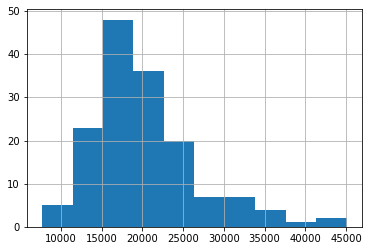

In [11]:
#Histogram Plot
df['Sales'].hist()
plt.show()

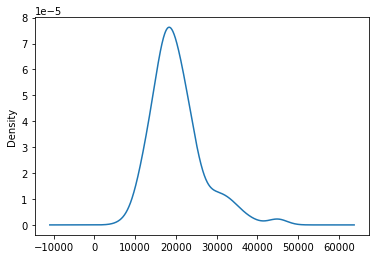

In [12]:
#Density Plot
df['Sales'].plot(kind='kde')
plt.show()

C:\Users\DEll\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

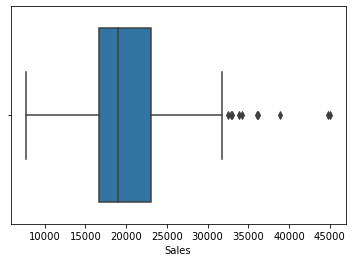

In [13]:
#Box Plot
import seaborn as sns
sns.boxplot(df['Sales'])

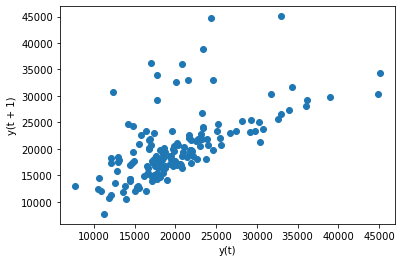

In [14]:
#Lag Plot
from pandas.plotting import lag_plot
lag_plot(df['Sales'])
plt.show()

In [15]:
df.shape

(153, 1)

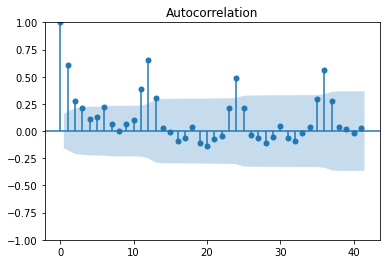

In [16]:
#AutoCorrelation Function ACF PLOT
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Sales'],lags=41)
plt.show()

In [18]:
#Splitting Dataset
train=df.head(103)
test=df.tail(50)

<AxesSubplot:xlabel='Month', ylabel='Sales'>

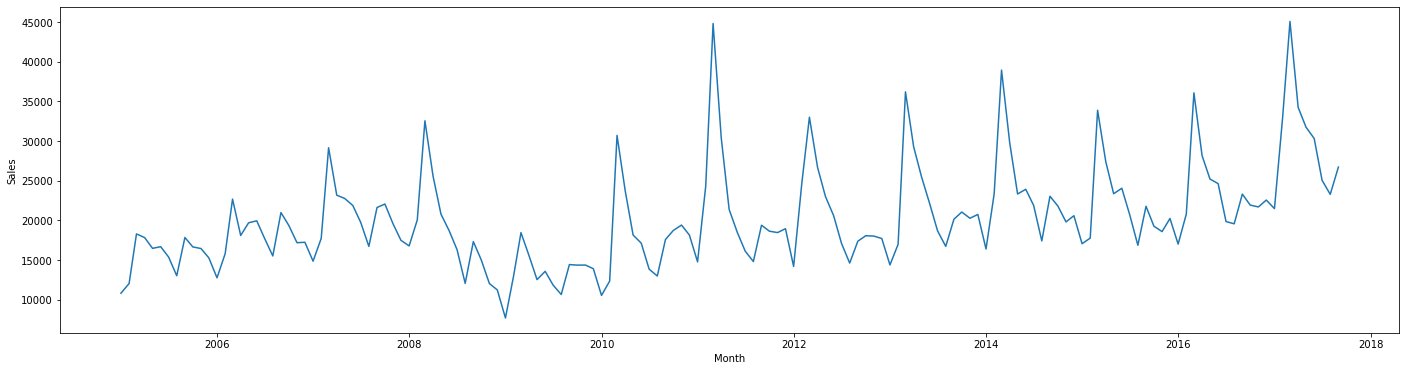

In [19]:
plt.figure(figsize=(24,6)) #we are taking ASPECT RATIO=0.25
sns.lineplot(x='Month',y='Sales',data=df)

Linear Modelling process

In [20]:
import numpy as np
df['t']=np.arange(len(df))
train=df.head(103)
test=df.tail(50)

In [21]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Sales~t',data=train).fit()
predict_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean(np.array(test['Sales']-np.array(predict_linear))**2))
rmse_linear

6138.270645437971

Exponential Modelling Process

In [22]:
df['log_Sales']=np.log(df['Sales'])
df.head()

,Sales,t,log_Sales
Month,,,
2005-01-01,10827,0,9.289798
2005-02-01,12049,1,9.396737
2005-03-01,18298,2,9.814547
2005-04-01,17834,3,9.788862
2005-05-01,16480,4,9.709903


In [24]:
train=df.head(103)
test=df.tail(50)

In [25]:
expo_model=smf.ols('log_Sales~t',data=train).fit()
predict_expo=pd.Series(expo_model.predict(pd.DataFrame(test['t'])))
rmse_expo=np.sqrt(np.mean(np.array(test['log_Sales'])-np.array(predict_expo))**2)
rmse_expo

0.10158863967058859

Quadratic Model

In [27]:
df['t_square']=np.square(df['t'])
df.head()

,Sales,t,log_Sales,t_square
Month,,,,
2005-01-01,10827,0,9.289798,0
2005-02-01,12049,1,9.396737,1
2005-03-01,18298,2,9.814547,4
2005-04-01,17834,3,9.788862,9
2005-05-01,16480,4,9.709903,16


In [28]:
train=df.head(103)
test=df.tail(50)

In [29]:
quad_model=smf.ols('Sales~t+t_square',data=train).fit()
predict_quad=pd.Series(quad_model.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad=np.sqrt(np.mean(np.array(test['Sales'])-np.array(predict_quad))**2)
rmse_quad

2160.116733192199

Additive Seasoning

In [31]:
quarters = pd.PeriodIndex(df.index, freq='Q')
df['Quarters'] = quarters
quarterly_sales = df.groupby('Quarters')['Sales'].sum()

In [44]:
df.head(5)

,Sales,t,log_Sales,t_square,Quarters,Year,Quarter
Month,,,,,,,
2005-01-01,10827,0,9.289798,0,2005Q1,2005,1
2005-02-01,12049,1,9.396737,1,2005Q1,2005,1
2005-03-01,18298,2,9.814547,4,2005Q1,2005,1
2005-04-01,17834,3,9.788862,9,2005Q2,2005,2
2005-05-01,16480,4,9.709903,16,2005Q2,2005,2
